In [158]:
import numpy as np
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the dataset:

lst= [file for file in os.listdir(r'C:\Users\light\Desktop\data analysis\datasets\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data')]
all_months_data= pd.DataFrame()

for file in lst:
    df= pd.read_csv('C:\\Users\\light\\Desktop\\data analysis\\datasets\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\'+file)

    all_months_data= pd.concat([all_months_data, df])

In [5]:
all_months_data= all_months_data.dropna(axis= 0, how= 'all').reset_index(drop= True)

In [6]:
df_all= all_months_data.copy()

In [7]:
df_all.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [8]:
# doing some filtering:
df_all= df_all.dropna(axis= 0, how= 'all').reset_index(drop= True)

In [9]:
df_all.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [10]:
df_all.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [11]:
date= []
for i in df_all['Order Date']:
    date.append('20'+i[6:8]+'/'+i[:2]+'/'+i[3:5])

In [12]:
df_all['Order Date']= date

In [13]:
df_all.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019/04/19,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2019/04/07,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,2019/04/12,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2019/04/12,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,2019/04/30,"333 8th St, Los Angeles, CA 90001"


# changing

In [40]:
df_filtered= all_months_data.copy()

In [41]:
df_filtered= df_filtered[df_filtered['Order Date'] != 'Order Date']
df_filtered['Order Date'] = pd.to_datetime(df_filtered['Order Date'])
df_filtered.reset_index(drop= True)
df_filtered.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


# best month for sale and total earned

In [42]:
df_filtered.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [43]:
for i in ['Quantity Ordered', 'Price Each']:
    df_filtered[i]= df_filtered[i].astype(float)

In [44]:
df_filtered.dtypes

Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [45]:
df_filtered['Month'] = df_filtered['Order Date'].dt.month
df_filtered['Total Earning']= df_filtered['Quantity Ordered'] * df_filtered['Price Each']

In [46]:
df_filtered.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Earning
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [47]:
# desired_month

In [48]:
df_filtered.groupby('Month')['Total Earning'].sum()

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Total Earning, dtype: float64

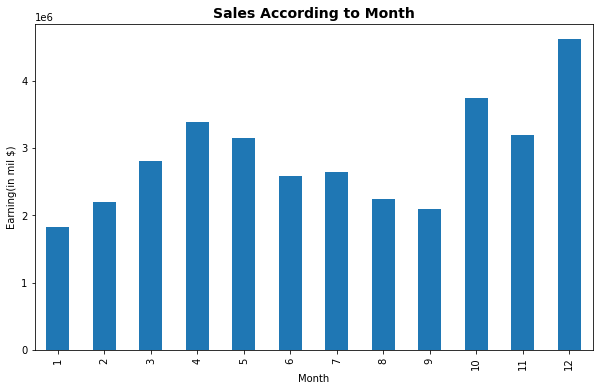

In [49]:
plt.figure(figsize= (10, 6))
df_filtered.groupby('Month')['Total Earning'].sum().plot(kind= 'bar', ylabel= 'Earning(in mil $)')
plt.title('Sales According to Month', size= 14, weight= 'bold')
plt.show()

### conclusion:  december has the maximum number of sales

# city with highest number of sales

In [50]:
df_filtered.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Earning
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [51]:
# creating city column and placing it in the df_filtered dataset:

def get_city(address):
    return address.split(',')[1]

def get_states(address):
    return address.split(',')[2]


df_filtered['City']= df_filtered['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_states(x).split()[0]})')

In [52]:
df_filtered.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Earning,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [53]:
# city with highest sales:
highest_sales= df_filtered.groupby('City')['Total Earning'].sum().sort_values(ascending= False)
highest_sales

City
 San Francisco (CA)    8.262204e+06
 Los Angeles (CA)      5.452571e+06
 New York City (NY)    4.664317e+06
 Boston (MA)           3.661642e+06
 Atlanta (GA)          2.795499e+06
 Dallas (TX)           2.767975e+06
 Seattle (WA)          2.747755e+06
 Portland (OR)         1.870732e+06
 Austin (TX)           1.819582e+06
 Portland (ME)         4.497583e+05
Name: Total Earning, dtype: float64

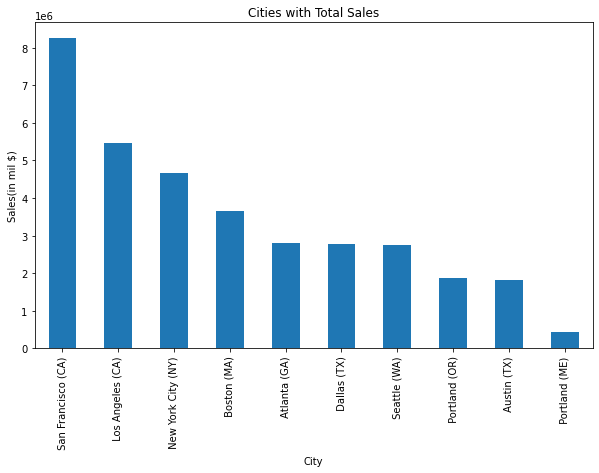

In [54]:
highest_sales.plot(kind= 'bar', ylabel= "Sales(in mil $)", figsize= (10, 6), title= 'Cities with Total Sales')
plt.show()

### Conclusion: 
             San Francisco has the highest and Portland(ME) has the least number of sales

# Hour when sales are high

In [55]:
df_filtered


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Earning,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176562,USB-C Charging Cable,1.0,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco (CA)
6,176563,Bose SoundSport Headphones,1.0,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,99.99,Seattle (WA)
7,176564,USB-C Charging Cable,1.0,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta (GA)
8,176565,Macbook Pro Laptop,1.0,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco (CA)
9,176566,Wired Headphones,1.0,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,11.99,Boston (MA)


In [56]:
Hour= df_filtered['Order Date'].dt.hour
df_filtered['Hour']= df_filtered.insert(loc= 5, column= 'Hour', value= Hour)

In [57]:
df_filtered['Hour']= Hour

### Hour when sales are high

In [58]:
sales_hour= df_filtered.groupby('Hour')['Total Earning'].sum().sort_values(ascending= False)
sales_hour

Hour
19    2412938.54
12    2316821.34
11    2300610.24
20    2281716.24
18    2219348.30
13    2155389.80
17    2129361.61
14    2083672.73
21    2042000.86
10    1944286.77
15    1941549.60
16    1904601.31
9     1639030.58
22    1607549.21
8     1192348.97
23    1179304.44
7      744854.12
0      713721.27
1      460866.88
6      448113.00
2      234851.44
5      230679.82
4      162661.01
3      145757.89
Name: Total Earning, dtype: float64

In [60]:
sales_hour_1= df_filtered.groupby('Hour')['Total Earning'].sum()

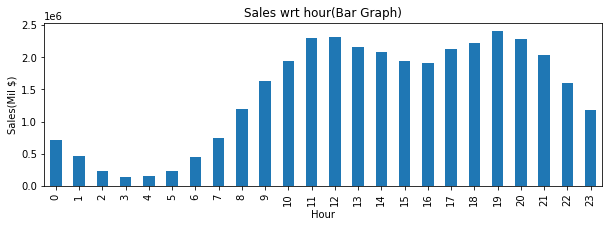

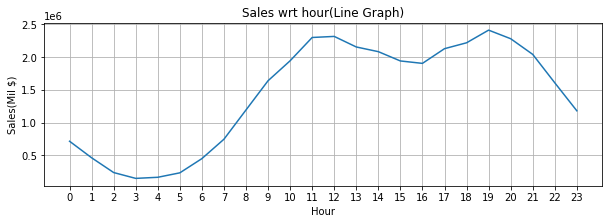

In [63]:
plt.subplot(1, 2, 1)
sales_hour_1.plot(kind= 'bar', ylabel= 'Sales(Mil $)', figsize= (22, 3), title= 'Sales wrt hour(Bar Graph)')
plt.show()

plt.subplot(1, 2, 2)
sales_hour_1.plot(kind= 'line', ylabel= 'Sales(Mil $)', figsize= (22, 3), title= 'Sales wrt hour(Line Graph)', xticks= pd.Series(Hour.unique()).sort_values())
plt.grid()
plt.show()

### conclusion:
   Hour '12' and '19' are best for sales

# finding products that are often sold together

In [64]:
df_filtered

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Hour,Purchase Address,Month,Total Earning,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,8,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,22,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,14,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,14,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,9,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176562,USB-C Charging Cable,1.0,11.95,2019-04-29 13:03:00,13,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco (CA)
6,176563,Bose SoundSport Headphones,1.0,99.99,2019-04-02 07:46:00,7,"668 Center St, Seattle, WA 98101",4,99.99,Seattle (WA)
7,176564,USB-C Charging Cable,1.0,11.95,2019-04-12 10:58:00,10,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta (GA)
8,176565,Macbook Pro Laptop,1.0,1700.00,2019-04-24 10:38:00,10,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco (CA)
9,176566,Wired Headphones,1.0,11.99,2019-04-08 14:05:00,14,"83 7th St, Boston, MA 02215",4,11.99,Boston (MA)


In [118]:
item_together= df_filtered.groupby('Order ID')['Product'].unique()

In [119]:
df_item_together= pd.DataFrame(item_together)

In [120]:
df_item_together['Number_of_Item']= df_item_together['Product'].apply(lambda x: len(x))

In [123]:
df_item_together_1= df_item_together.sort_values(by= 'Number_of_Item', ascending= False).where(df_item_together['Number_of_Item'] != 1).dropna(how= 'all', axis= 0)

In [134]:
df_item_together_1.head(10)

,Product,Number_of_Item
Order ID,,
160873,"[iPhone, Lightning Charging Cable, Apple Airpods Headphones, Wired Headphones, Google Phone]",5.0
193511,"[Google Phone, USB-C Charging Cable, Bose SoundSport Headphones, Wired Headphones]",4.0
277875,"[Google Phone, USB-C Charging Cable, Wired Headphones, iPhone]",4.0
165665,"[Google Phone, USB-C Charging Cable, Wired Headphones, AA Batteries (4-pack)]",4.0
289117,"[Vareebadd Phone, USB-C Charging Cable, Bose SoundSport Headphones, Wired Headphones]",4.0
296353,"[iPhone, Lightning Charging Cable, Wired Headphones, AA Batteries (4-pack)]",4.0
196615,"[Google Phone, USB-C Charging Cable, Bose SoundSport Headphones, Wired Headphones]",4.0
295681,"[Google Phone, USB-C Charging Cable, Bose SoundSport Headphones, Wired Headphones]",4.0
312407,"[Google Phone, USB-C Charging Cable, Wired Headphones, Apple Airpods Headphones]",4.0


### conclusion: these are the items combination by which people buy products

In [135]:
# what is the max number of item customer buy:

df_item_together_1['Number_of_Item'].value_counts()

2.0    6479
3.0     337
4.0      15
5.0       1
Name: Number_of_Item, dtype: int64

### ans: peopole mostly buy 2 items

# finding the most sold product

In [137]:
df_filtered.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Hour,Purchase Address,Month,Total Earning,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,8,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,22,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,14,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)


In [150]:
most_bought= df_filtered.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending= False)
most_bought

Product
AAA Batteries (4-pack)        31017.0
AA Batteries (4-pack)         27635.0
USB-C Charging Cable          23975.0
Lightning Charging Cable      23217.0
Wired Headphones              20557.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
27in FHD Monitor               7550.0
iPhone                         6849.0
27in 4K Gaming Monitor         6244.0
34in Ultrawide Monitor         6199.0
Google Phone                   5532.0
Flatscreen TV                  4819.0
Macbook Pro Laptop             4728.0
ThinkPad Laptop                4130.0
20in Monitor                   4129.0
Vareebadd Phone                2068.0
LG Washing Machine              666.0
LG Dryer                        646.0
Name: Quantity Ordered, dtype: float64

# Conclusion: 'AA Batteries' are the most sold products.

### Why: because batteries are the most common thing. People need these for their TV remote, torch, clock etc. 

### Also batteries are cheap. So it is obvious that these are the most sold products.

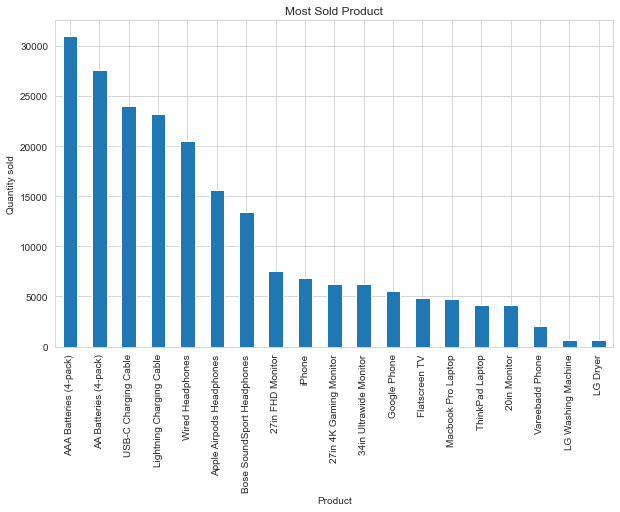

In [159]:
# we can also show these as graph:
sns.set_style('whitegrid')
most_bought.plot(kind= 'bar', figsize= (10, 6), ylabel= 'Quantity sold', title= 'Most Sold Product')
plt.show()

In [171]:
mean_price= df_filtered.groupby('Product')['Price Each'].mean().sort_values()

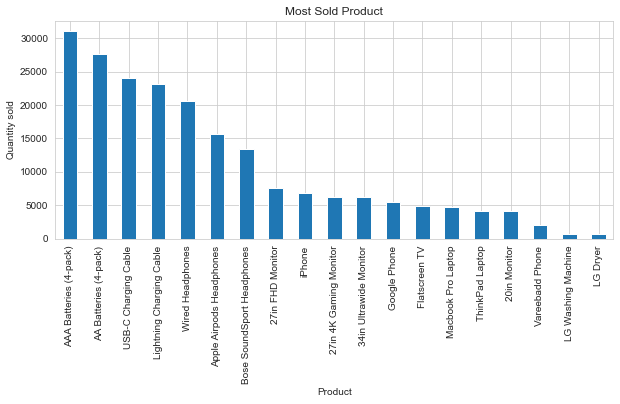

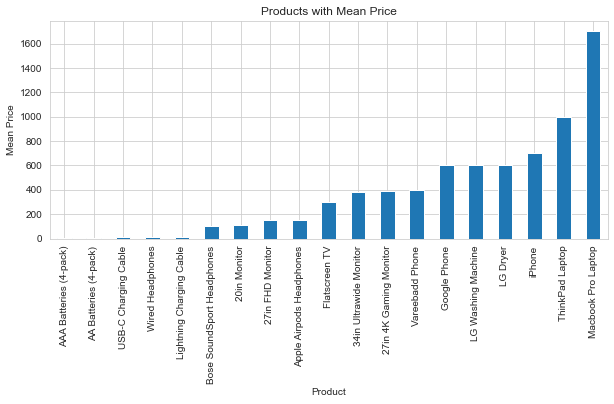

In [174]:
# if we show the quantity and price graph, it would be more clear.

plt.subplot(1, 2, 1)
sns.set_style('whitegrid')
most_bought.plot(kind= 'bar', figsize= (22, 4), ylabel= 'Quantity sold', title= 'Most Sold Product')
plt.show()

plt.subplot(1, 2, 1)
sns.set_style('whitegrid')
mean_price.plot(kind= 'bar', figsize= (22, 4), ylabel= 'Mean Price', title= 'Products with Mean Price')
plt.show()